In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import seaborn as sns
import numpy as np
import pickle

sns.set(context='notebook', style='ticks', font_scale=1.5)
plt.rcParams.update({'mathtext.fontset': 'stix'})

In [4]:
# get the results of CGBP
outdir = f'results/pubmed'
best = np.load(f'{outdir}/best.npy')
loss = np.load(f'{outdir}/loss.npy')
nvio = np.load(f'{outdir}/metric.npy')

In [15]:
# N_GC of 10 independent runs
np.min(nvio, axis=1)

array([0, 0, 0, 1, 2, 2, 3, 0, 1, 0])

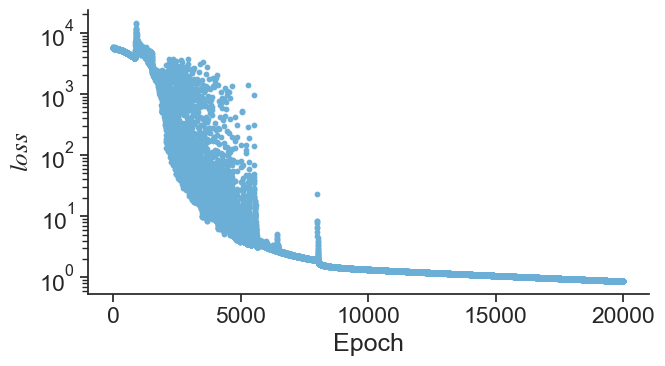

In [6]:
# plot the loss
set1=mpl.colormaps.get_cmap('tab20c')
sc1=set1(range(20))[1]
set2=mpl.colormaps.get_cmap('Accent')
sc2=set2(range(8))[2]

idx = 7 # index of the 10 runs
fig, ax = plt.subplots(figsize=(7, 4))
max_epoch = len(loss[idx])
ax.scatter(range(1, max_epoch+1), loss[idx], color=sc1, s=10)
ax.set_xticks(np.linspace(0, max_epoch, 5))
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('$loss$')
sns.despine(ax=ax)
plt.tight_layout()
plt.savefig('figs/pubmed_loss.png')

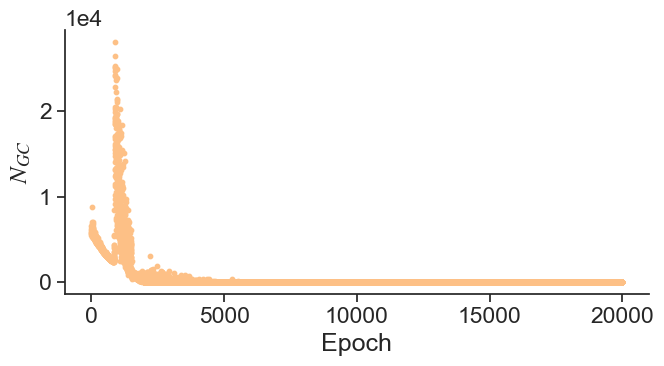

In [7]:
# plot the violations
fig, ax = plt.subplots(figsize=(7, 4))
max_epoch = len(nvio[idx])
ax.scatter(range(1, max_epoch+1), nvio[idx], color=sc2,s=10)
ax.set_xticks(np.linspace(0, max_epoch, 5))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlabel('Epoch')
ax.set_ylabel('$N_{GC}$')
sns.despine(ax=ax)
plt.tight_layout()
plt.savefig('figs/pubmed_ngc.png')

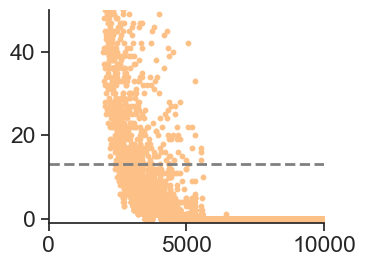

In [8]:
# zoom in
fig, ax = plt.subplots(figsize=(4, 3))
max_epoch = len(nvio[idx])
ax.scatter(range(1, max_epoch+1), nvio[idx], color=sc2,s=10)
ax.set_xticks(np.linspace(0, max_epoch, 5))
ax.axhline(y=13, lw=2, ls='--', color='gray')
ax.set_ylim(-1, 50)
ax.set_xlim(0, 10000)
sns.despine(ax=ax)
plt.tight_layout()
plt.savefig('figs/pubmed_ngc_zoom.png')

In [9]:
# get the node positions of the Pubmed graph
with open(f'{outdir}/pos.pkl', 'rb') as f:
    pos = pickle.load(f)

In [11]:
from cgbp.gc import build_graph_from_file_citation

g = build_graph_from_file_citation('pubmed')
g_nx = g.to_networkx().to_undirected()

  NumNodes: 19717
  NumEdges: 88651
  NumFeats: 500
  NumClasses: 3
  NumTrainingSamples: 60
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
--------------------------------------------------
  Number of nodes: 19717
  Number of edges: 88648
--------------------------------------------------


In [12]:
# color edges with confliction
def edge_to_cs(edges, bs, equal_c='red', uneq_c='.2'):
    cs = []
    for edge in edges:
        if edge[0] != edge[1]:
            if bs[edge[0]] == bs[edge[1]]:
                cs.append(equal_c)
            else:
                cs.append(uneq_c)
        else:
            cs.append('1.')
    return cs

In [13]:
# color nodes
color_dict = {0:'orange', 
              1:'lightblue', 
              2:'purple', 
              3:'red', 
              4:'lightgreen',
              5:'pink',
              6:'brown',
              7:'yellow'}

coloring = best[0]
edge_colors = edge_to_cs(g_nx.edges, coloring, uneq_c='0.8')
width = [3 if c == 'red' else 1 for c in edge_colors]
color_map = np.vectorize(color_dict.get)(coloring)
color_map =[color_map[i] for i in g_nx.nodes]

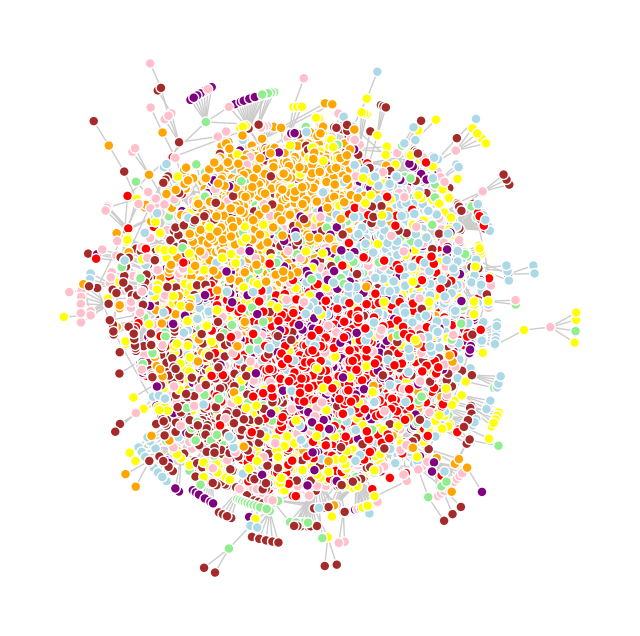

In [14]:
# plot the coloring result of CGBP
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(g_nx, pos, with_labels=False, node_color=color_map,
        edge_color=edge_colors, node_size=50, width=width, linewidths=1, 
        edgecolors='w', ax=ax)
plt.savefig('figs/pubmed_coloring.png')